In [2]:
from SyncRNG import SyncRNG
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다

In [6]:
# 데이터 불러오기
raw_data = pd.read_csv('E:/GoogleDrive/포트폴리오/A5팀 R과 Python기반 머신러닝과 딥러닝 분석 비교(12월22일)/dataset/product.csv',encoding='cp949')

# 데이터 셋  7:3 으로 분할
v=list(range(1,len(raw_data)+1))
s=SyncRNG(seed=42)
ord=s.shuffle(v)
idx=ord[:round(len(raw_data)*0.7)]

# R에서는 데이터프레임이 1부터 시작하기 때문에
# python에서 0행과 R에서 1행이 같은 원리로
# 같은 인덱스 번호를 가진다면 -1을 해주어 같은 데이터를 가지고 오게 한다.
# 인덱스 수정-R이랑 같은 데이터 가져오려고
for i in range(0,len(idx)):
    idx[i]=idx[i]-1

# 학습데이터, 테스트데이터 생성
train=raw_data.loc[idx] # 70%
#train=train.sort_index(ascending=True)
test=raw_data.drop(idx) # 30%

x_train = train.제품_적절성
y_train = train.제품_만족도
x_test = test.제품_적절성
y_test = test.제품_만족도

print(train)

     제품_친밀도  제품_적절성  제품_만족도
165       3       3       3
72        4       3       3
129       3       4       4
116       1       3       2
100       5       5       4
..      ...     ...     ...
220       3       3       2
224       4       4       4
150       1       1       1
118       1       3       3
207       5       5       4

[185 rows x 3 columns]


In [7]:
class Neuron:
    def __init__(self):
        self.w = 1  # 가중치를 초기화합니다
        self.b = 1 # 절편을 초기화합니다

    def forpass(self, x):
        y_hat = x * self.w + self.b  # 직선 방정식을 계산합니다
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err  # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err  # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, lr, epochs=400):
        for i in range(epochs):  # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복합니다
                n=len(x)
                y_hat = self.forpass(x_i)  # 정방향 계산
                err = -(2/n)*(y_i - y_hat)  # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad*lr  # 가중치 업데이트
                self.b -= b_grad*lr # 절편 업데이트
            if i % 10 == 0:
                print('[',i,']',err, self.w, self.b)

In [8]:
neuron = Neuron()
neuron.fit(x_train, y_train, 0.01)


predict=[]
predict = x_test * neuron.w + neuron.b

from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(predict, y_test)))

[ 0 ] 0.01823849722375206 0.9401388362314644 0.981624802761568
[ 10 ] 0.006015766834276679 0.7280395772033643 0.9146964467768592
[ 20 ] 0.004734230750567926 0.7062723325689252 0.9053237815877597
[ 30 ] 0.004610991244763533 0.704648373245413 0.9020759661899233
[ 40 ] 0.004610225881327184 0.7051480414459401 0.8995070280639188
[ 50 ] 0.004622262819513542 0.7058635180417441 0.897039932263209
[ 60 ] 0.004635492103056562 0.7065929226795185 0.8946131781883458
[ 70 ] 0.004648686653427482 0.7073150001712064 0.8922198560561189
[ 80 ] 0.004661718713822103 0.7080276185160064 0.8898588415829182
[ 90 ] 0.004674576895724644 0.7087306689026895 0.8875296283481933
[ 100 ] 0.004687262103033893 0.7094242551632053 0.8852317805678199
[ 110 ] 0.004699776512774621 0.7101085020910951 0.8829648750828549
[ 120 ] 0.004712122408745452 0.7107835351669487 0.8807284951479372
[ 130 ] 0.004724302058401418 0.7114494784323395 0.8785222297052497
[ 140 ] 0.004736317700189734 0.712106454285064 0.876345673240181
[ 150 ] 0.00

C:\Users\yimst\AppData\Local\Temp\ipykernel_9416\3848095786.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_test, predict, 'r-', color='yellow')


<function matplotlib.pyplot.show(close=None, block=None)>

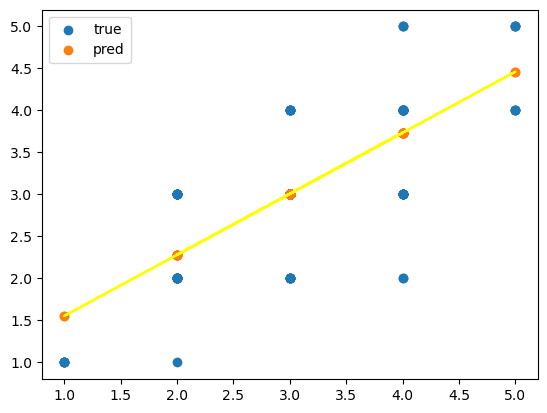

In [9]:
plt.scatter(x_train, y_train, label='true')
plt.scatter(x_test, predict, label='pred')
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (5, 5 * neuron.w + neuron.b)
# plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]],color='orange')
plt.plot(x_test, predict, 'r-', color='yellow')
plt.legend()
plt.show